# Data Preparation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
original = pd.read_csv("data/smoker_train.csv")

## Clean-Up
- No null values in the data set
- Keeping seemingly unrealistic values, as there is a chance that they are possible
- No impossible values found (e.g. systolic < relaxation)
- Keeping all columns as they could all be relevant for modeling

In [5]:
def clean_up(df):
    x = df.drop_duplicates()
    x = x[abs(x["Cholesterol"] - x["HDL"] - x["LDL"] - x["triglyceride"] / 5) < 30]
    return x 

print(len(clean_up(original)))

33344


## Image regarding Cholesterol

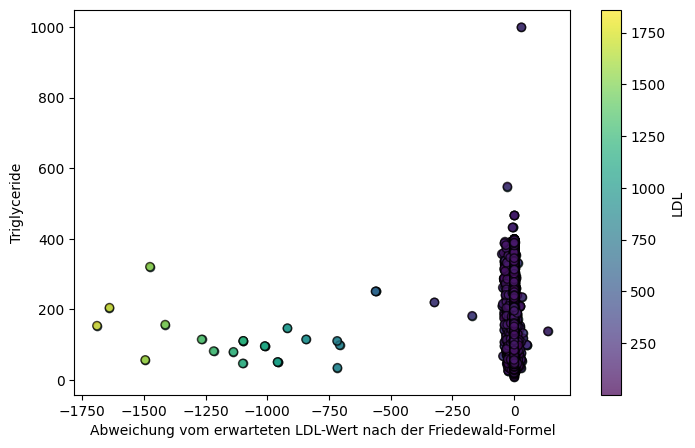

In [6]:
x = original
x["triglyceride5"] = x["triglyceride"] / 5
x["chol_diff"] = x["Cholesterol"]-x["HDL"]-x["LDL"]-x["triglyceride5"]
plt.figure(figsize=(8, 5))
plt.scatter(x["chol_diff"], x["triglyceride"], alpha=0.7, color='teal', edgecolor='k')
plt.ylabel("Triglyceride")
plt.xlabel("Abweichung vom erwarteten LDL-Wert nach der Friedewald-Formel")
sc = plt.scatter(x["chol_diff"], x["triglyceride"], c=x["LDL"], alpha=0.7, cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='LDL')
plt.show()